# MNIST

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Load data

In [3]:
mnist_28x28_train = np.load("MNIST/mnist_28x28_train.npy")
mnist_8x8_train = np.load("MNIST/mnist_8x8_train.npy")
train_labels = np.load("MNIST/train_labels.npy")

mnist_28x28_test = np.load("MNIST/mnist_28x28_test.npy")
mnist_8x8_test = np.load("MNIST/mnist_8x8_test.npy")

###  Data exploration

#### Question 4.1.1

In [4]:
# You can use plt.imshow to visualize the digits from the dataset
index = 0
'''
#This is for printing all the pictures of these numbers.!!!LARGE FILE WARNING
for pic in mnist_28x28_train:
    plt.subplot(1,2,1)
    plt.imshow(mnist_28x28_train[index])
    plt.title("plot1")
    plt.subplot(1,2,2)
    plt.imshow(mnist_8x8_train[index])
    plt.title("plot2")
    index += 1
    plt.show()
'''
#count the existance of each number 
import pandas as pd
result = pd.value_counts(train_labels)
print(result)

0    395
4    388
3    378
9    377
1    376
6    371
2    367
7    366
5    366
8    366
dtype: int64


###  Data preparation

In [5]:
#preprocessing the shape of the input data, 784 = 28 * 28
train_data = mnist_28x28_train
train_data = np.reshape(mnist_28x28_train, (3750, 784))
train_data_8x8 = np.reshape(mnist_8x8_train, (3750, 64))
test_data = np.reshape(mnist_28x28_test, (mnist_28x28_test.shape[0], 784))

### Experiments

In [6]:
print(mnist_28x28_train[0])
#print(mnist_8x8_train[0])
#The numbers are represented in gray scale values.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   64 255 255  64   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  255 255 255  64   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255 255 191   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [7]:
#code for 4.3.1
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
random_state = 42

#set hyper-parameters
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(C = 10, kernel = 'poly', degree = 3, gamma = 'scale',random_state = 42),
    "SGDClassifier": SGDClassifier(loss='log', alpha=10, learning_rate = 'constant', eta0=0.1, penalty = 'none', random_state=42)
}

#The method for using k-fold validation
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)
    return scores["test_score"]

#The scorer method to be use, which is the accuracy_score
scoring_method = make_scorer(lambda prediction, true_target: accuracy_score(true_target, prediction))

In [8]:
print(mnist_28x28_train.shape)
print(train_data_8x8.shape)

(3750, 28, 28)
(3750, 64)


In [9]:
#code for 4.3.2
for name, model in models.items():
    model.fit(train_data_8x8, train_labels)
metrics = []
for name, model in models.items():
    metrics_acc = k_fold_fit_and_evaluate(train_data_8x8, train_labels, model, scoring_method, n_splits = 5)
    metrics.append(metrics_acc)
    plt.plot(metrics_acc, label = name)
    plt.legend()
print("mean         ", "           std")
for temp in metrics:
    print(np.mean(temp), np.std(temp))

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [9]:
#code for 4.3.3
#No code for this question

In [16]:
#code for 4.3.4
from sklearn.model_selection import GridSearchCV

random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda true_target, prediction: accuracy_score(true_target, prediction))

model_parameters = {
    "SGDClassifier": {
        'loss':["log"],
        'alpha':[0.1, 0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9],
        'learning_rate':["constant"],
        'eta0':[0, 0.1, 0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9],
        'penalty':["none","l2","l1"]
    }
}

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(train_data_8x8, train_labels)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)

SGDClassifier
- best_score = 0.7994666666666667
best paramters:
- alpha 0.1
- eta0 0.2
- learning_rate constant
- loss log
- penalty none


C:\Users\DavidHuang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DavidHuang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DavidHuang\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\DavidHuang\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  Fil

In [18]:
#code for 4.3.4
from sklearn.model_selection import GridSearchCV

random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda true_target, prediction: accuracy_score(true_target, prediction))

model_parameters = {
    "DecisionTreeClassifier": {
        'random_state': [random_state],
        'min_samples_leaf':[2,5,10,20],
        'max_depth': [None,1,2,3,4,5,6,7,8,9,10]
    },
    "SVM": {
        'C': [1,5,10,15,20],
        'kernel':["poly","linear","rbf"],
        'degree':[1,3,5,7,9],
        'gamma':["scale", "auto", "float"],
        'random_state': [random_state]
    }
}

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(train_data_8x8, train_labels)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)

DecisionTreeClassifier
- best_score = 0.772
best paramters:
- max_depth None
- min_samples_leaf 3
- random_state 42


In [1]:
#code for 4.3.5
from sklearn.model_selection import GridSearchCV

random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda true_target, prediction: accuracy_score(true_target, prediction))

model_parameters = {
    "SGDClassifier": {
        'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8, 0.9,1],
        'random_state': [random_state],
        'max_iter': [100, 200, 300, 400, 500]
    }
}

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(train_data, train_labels)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)

NameError: name 'make_scorer' is not defined

THIS PART IS FOR 28x28
mean                     std
0.5744 0.030280466751136225
0.7269333333333334 0.0062765878911678966
0.9277333333333333 0.0028472208672083543
0.9458666666666667 0.0067777413478073865
0.8341333333333333 0.01778088861671428
THIS PART IS FOR 8x8
mean                     std
0.5837333333333333 0.01823110894414636
0.772 0.022199099080818553
0.9266666666666665 0.0075894663844041175
0.9485333333333333 0.005568163471418959
0.7994666666666667 0.027410946718418865


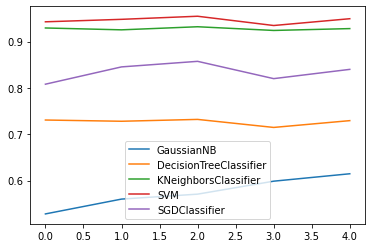

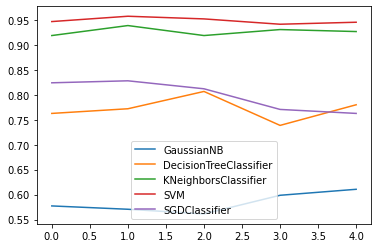

<Figure size 432x288 with 0 Axes>

In [20]:
#code for 4.3.6
train_data_8x8 = np.reshape(mnist_8x8_train, (3750, 64))
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=3, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=4, weights="distance"),
    "SVM": SVC(C = 15, kernel = 'rbf',gamma='scale',degree=1, random_state = 42),
    "SGDClassifier": SGDClassifier(loss='log', alpha=0.1, learning_rate = 'constant', eta0=0.2, penalty = 'none', random_state=42)
}
print("THIS PART IS FOR 28x28")
metrics = []
for name, model in models.items():
    metrics_acc = k_fold_fit_and_evaluate(train_data, train_labels, model, scoring_method, n_splits = 5)
    metrics.append(metrics_acc)
    plt.plot(metrics_acc, label = name)
    plt.legend()
print("mean         ", "           std")
for temp in metrics:
    print(np.mean(temp), np.std(temp))
plt.figure()
print("THIS PART IS FOR 8x8")
metrics1 = []
for name, model in models.items():
    metrics_acc1 = k_fold_fit_and_evaluate(train_data_8x8, train_labels, model, scoring_method, n_splits = 5)
    metrics1.append(metrics_acc1)
    plt.plot(metrics_acc1, label = name)
    plt.legend()
plt.figure()
print("mean         ", "           std")
for temp in metrics1:
    print(np.mean(temp), np.std(temp))

#### Question 4.3.7

In [21]:
# TODO
test_data = np.reshape(mnist_8x8_test, (mnist_8x8_test.shape[0], 64))
group_number = 66 # TODO replace this with the number of your group on Brightspace
svm = SVC(C = 15, kernel = 'rbf',gamma='scale',degree=1, random_state = 42).fit(train_data_8x8, train_labels)
predictions = svm.predict(test_data) # TODO replace this with you own predictions

pd.DataFrame(predictions).to_csv(f"{group_number}_classes_problem_mnist.txt", index=False, header=False)